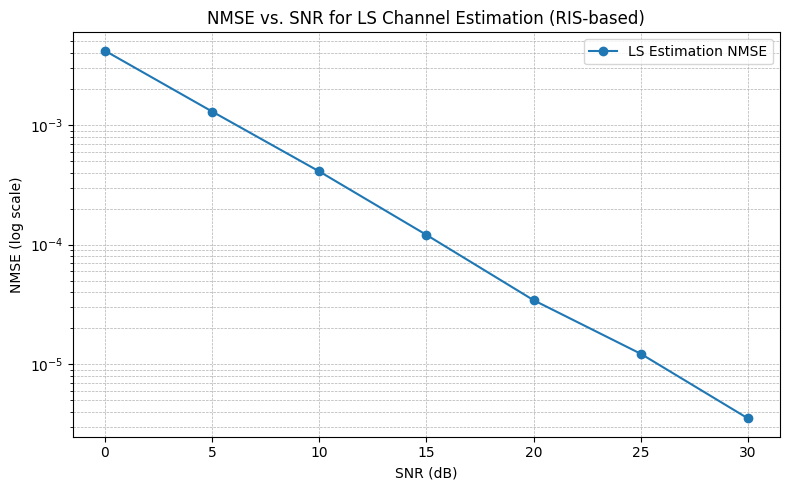

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: System Parameters
# ----------------------------
M = 4          # Number of BS antennas
N = 32         # Number of RIS elements
T = 4 * N      # Number of pilot time slots (T >= N for LS)
SNR_dB_range = np.arange(0, 31, 5)  # SNR values: 0 dB to 30 dB
num_trials = 20                     # Monte Carlo runs per SNR point

# ----------------------------
# Step 2: NMSE Recording
# ----------------------------
nmse_results = []

for SNR_dB in SNR_dB_range:
    sigma2 = 1 / (10**(SNR_dB / 10))  # Noise power from SNR
    nmse_trial = []

    for trial in range(num_trials):
        # ---- Step 2.1: True Channel to Estimate (N x 1)
        theta_true = (np.random.randn(N, 1) + 1j * np.random.randn(N, 1)) / np.sqrt(2)

        # ---- Step 2.2: Pilot & RIS Phase Design
        X = (np.random.randn(M, T) + 1j * np.random.randn(M, T)) / np.sqrt(2)     # M x T pilots
        Phi = np.exp(1j * 2 * np.pi * np.random.rand(N, T))                       # N x T phases
        H1 = (np.random.randn(N, M) + 1j * np.random.randn(N, M)) / np.sqrt(2)    # N x M channel

        y = np.zeros((T, 1), dtype=complex)
        A = np.zeros((T, N), dtype=complex)

        for t in range(T):
            x_t = X[:, t].reshape(M, 1)            # Pilot at time t
            phi_t = Phi[:, t].reshape(N, 1)        # Phase shift vector
            Hx = H1 @ x_t                          # Signal at RIS elements (N x 1)

            a_t = (phi_t.flatten() * Hx.flatten()).T  # (1 x N)
            A[t, :] = a_t

            noise = np.sqrt(sigma2 / 2) * (np.random.randn() + 1j * np.random.randn())
            y[t] = A[t, :] @ theta_true + noise    # Noisy measurement

        # ---- Step 2.3: Least Squares Estimation
        theta_est = np.linalg.pinv(A) @ y

        # ---- Step 2.4: Compute NMSE
        nmse = np.linalg.norm(theta_est - theta_true)**2 / np.linalg.norm(theta_true)**2
        nmse_trial.append(nmse)

    nmse_avg = np.mean(nmse_trial)
    nmse_results.append(nmse_avg)

# ----------------------------
# Step 3: Plot NMSE vs. SNR
# ----------------------------
plt.figure(figsize=(8, 5))
plt.semilogy(SNR_dB_range, nmse_results, marker='o', label='LS Estimation NMSE')
plt.title("NMSE vs. SNR for LS Channel Estimation (RIS-based)")
plt.xlabel("SNR (dB)")
plt.ylabel("NMSE (log scale)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


